In [ ]:
# Dataset Link : https://www.kaggle.com/code/niteshyadav3103/eda-e-commerce-shipping-data/input

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Preparation

In [ ]:
data=pd.read_csv('Train.csv')

In [ ]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
data.shape

(10999, 12)

In [ ]:
data.ndim

2

In [ ]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
missing_data_summary = data.isnull().sum()
print(missing_data_summary)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [ ]:
DATA_dropped_rows = data.dropna()

In [ ]:
data.to_csv('Train_cleaned.csv', index=False)

### Handling Outliers

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

for col in numeric_cols:
    if col != 'ID':
        data[col] = cap_outliers(data[col])
data.shape

(10999, 12)

In [ ]:
df=data.drop(['ID'], axis=1 )
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3.0,low,F,19.0,1233,1
1,F,Flight,4,5,216,2.0,low,M,19.0,3088,1
2,A,Flight,2,2,183,4.0,low,M,19.0,3374,1
3,B,Flight,3,3,176,4.0,medium,M,10.0,1177,1
4,C,Flight,2,2,184,3.0,medium,F,19.0,2484,1


### Exploratory Data Analysis (EDA)

In [ ]:
unique_values = df.nunique()
print(unique_values)

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           5
Product_importance        3
Gender                    2
Discount_offered         19
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64


### Univariate Analysis

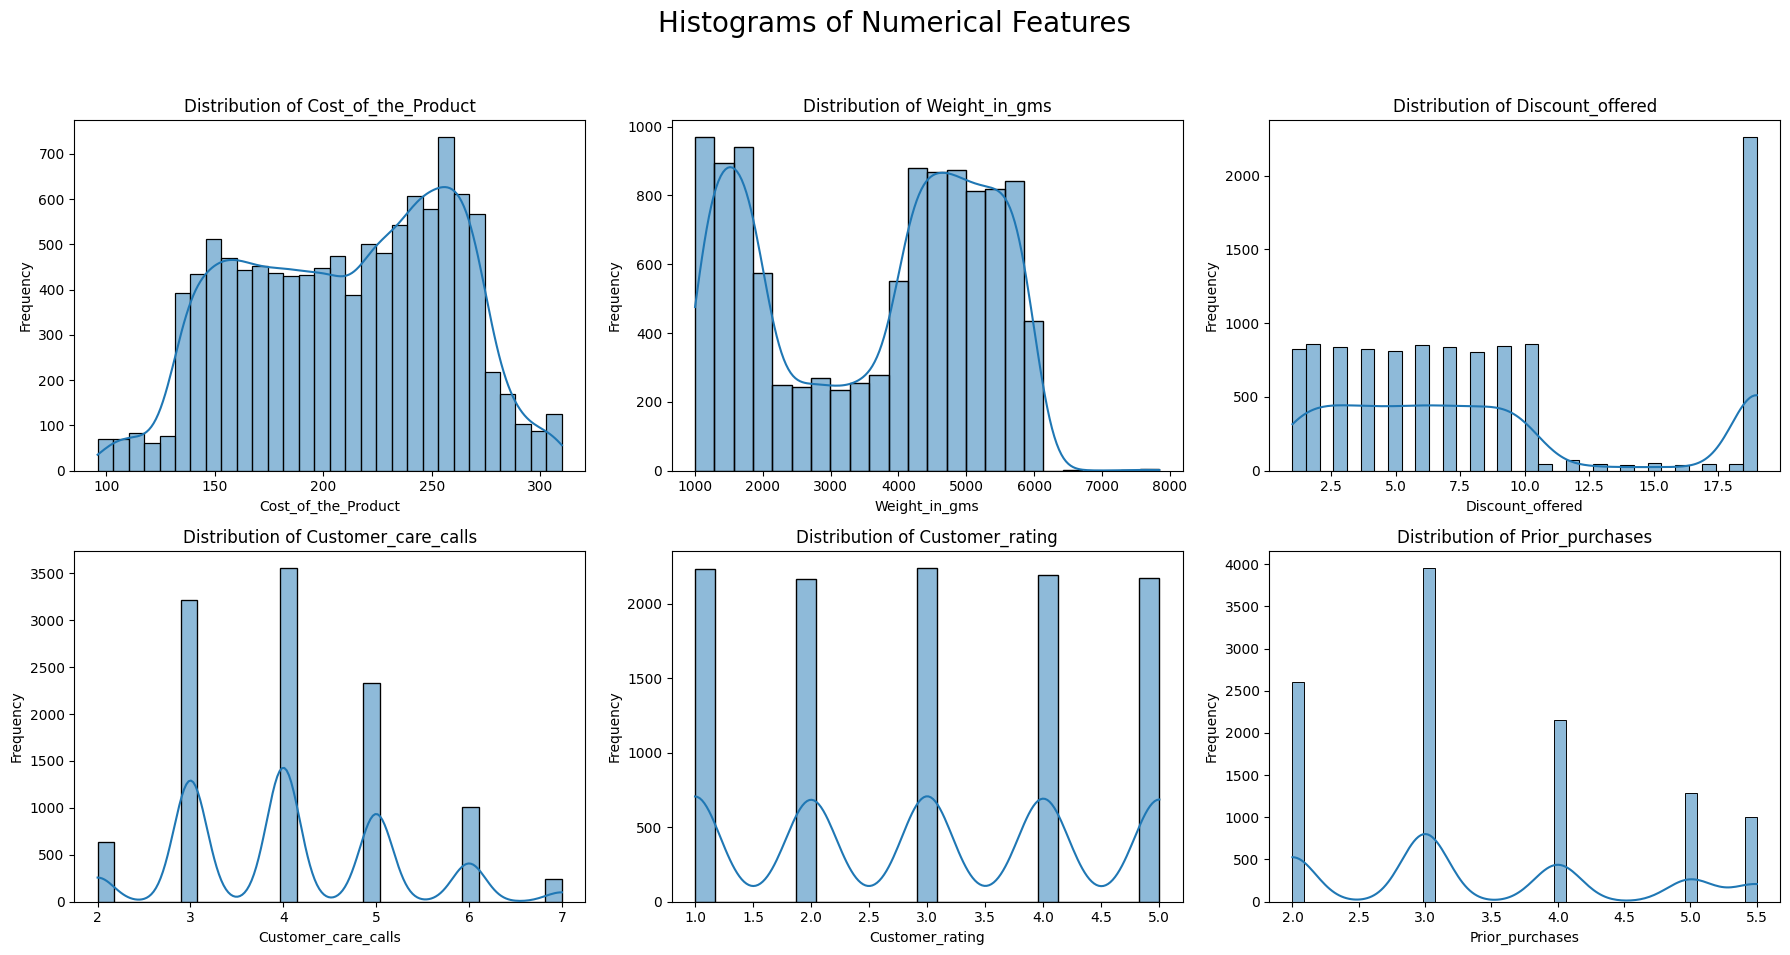

In [ ]:
numerical_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Histograms of Numerical Features', fontsize=20)

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Bivariate Analysis

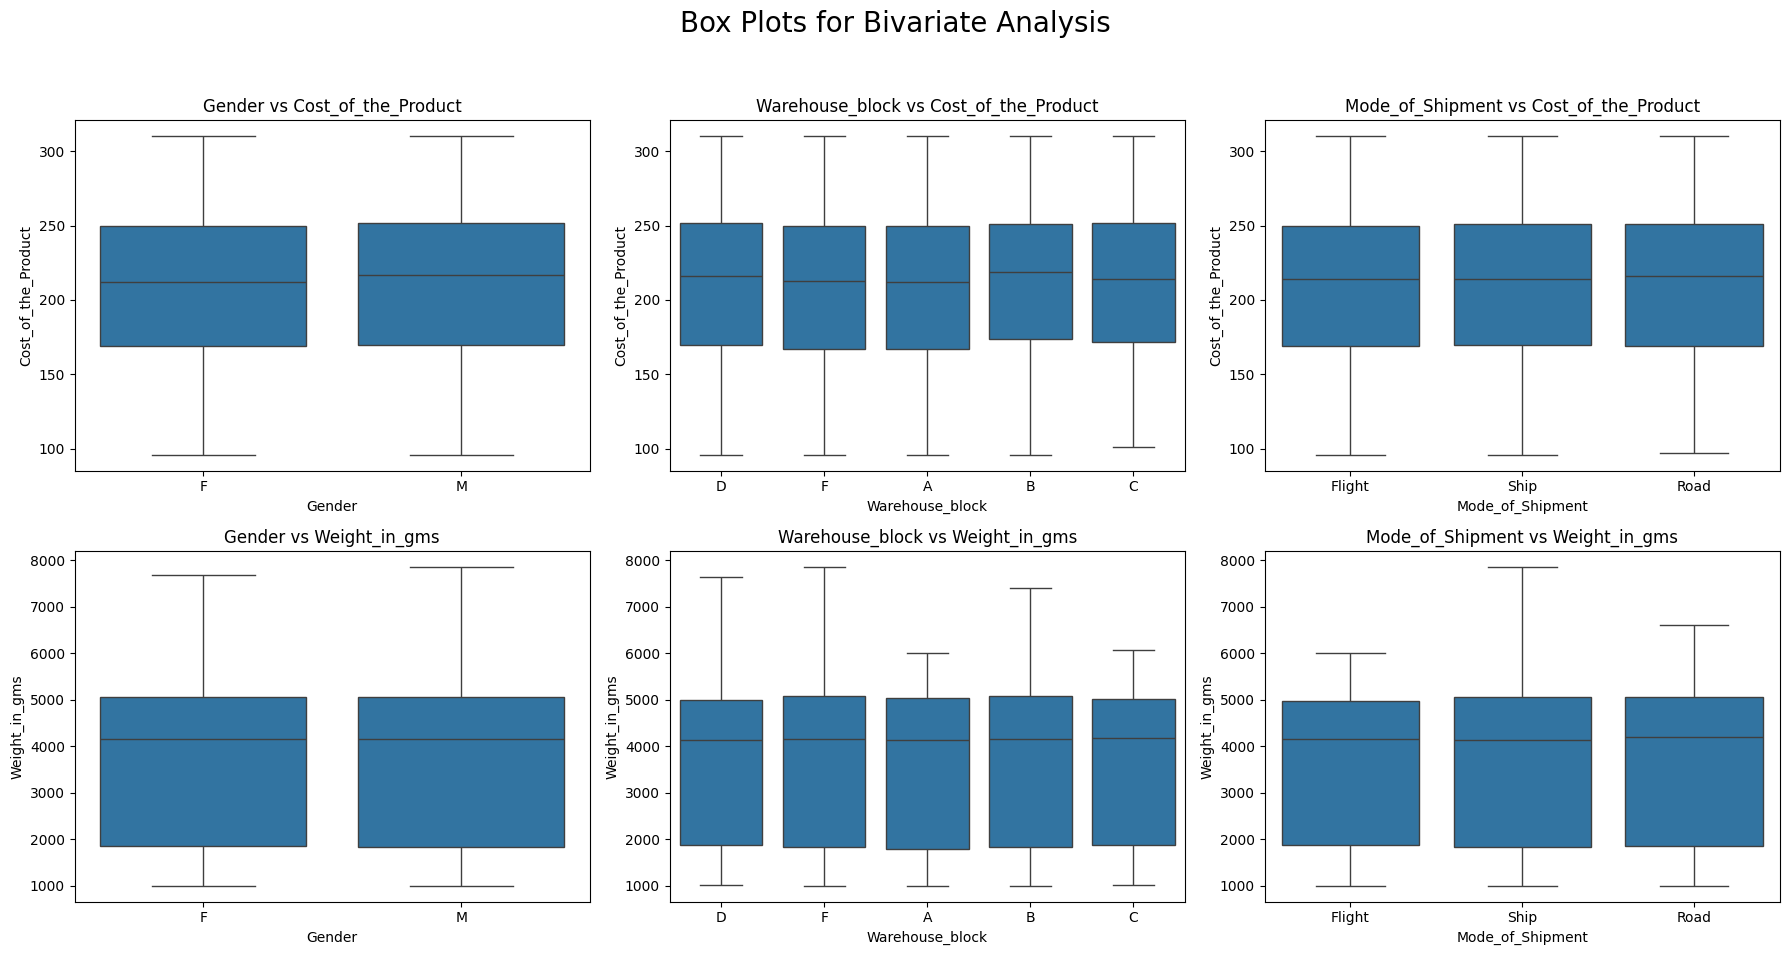

In [ ]:
categorical_features = ['Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
numerical_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Box Plots for Bivariate Analysis', fontsize=20)

for i, cat_feature in enumerate(categorical_features[:3]):
    sns.boxplot(x=cat_feature, y=numerical_features[0], data=df, ax=axes[0, i])
    axes[0, i].set_title(f'{cat_feature} vs {numerical_features[0]}')
    axes[0, i].set_xlabel(cat_feature)
    axes[0, i].set_ylabel(numerical_features[0])

for i, cat_feature in enumerate(categorical_features[:3]):
    sns.boxplot(x=cat_feature, y=numerical_features[1], data=df, ax=axes[1, i])
    axes[1, i].set_title(f'{cat_feature} vs {numerical_features[1]}')
    axes[1, i].set_xlabel(cat_feature)
    axes[1, i].set_ylabel(numerical_features[1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


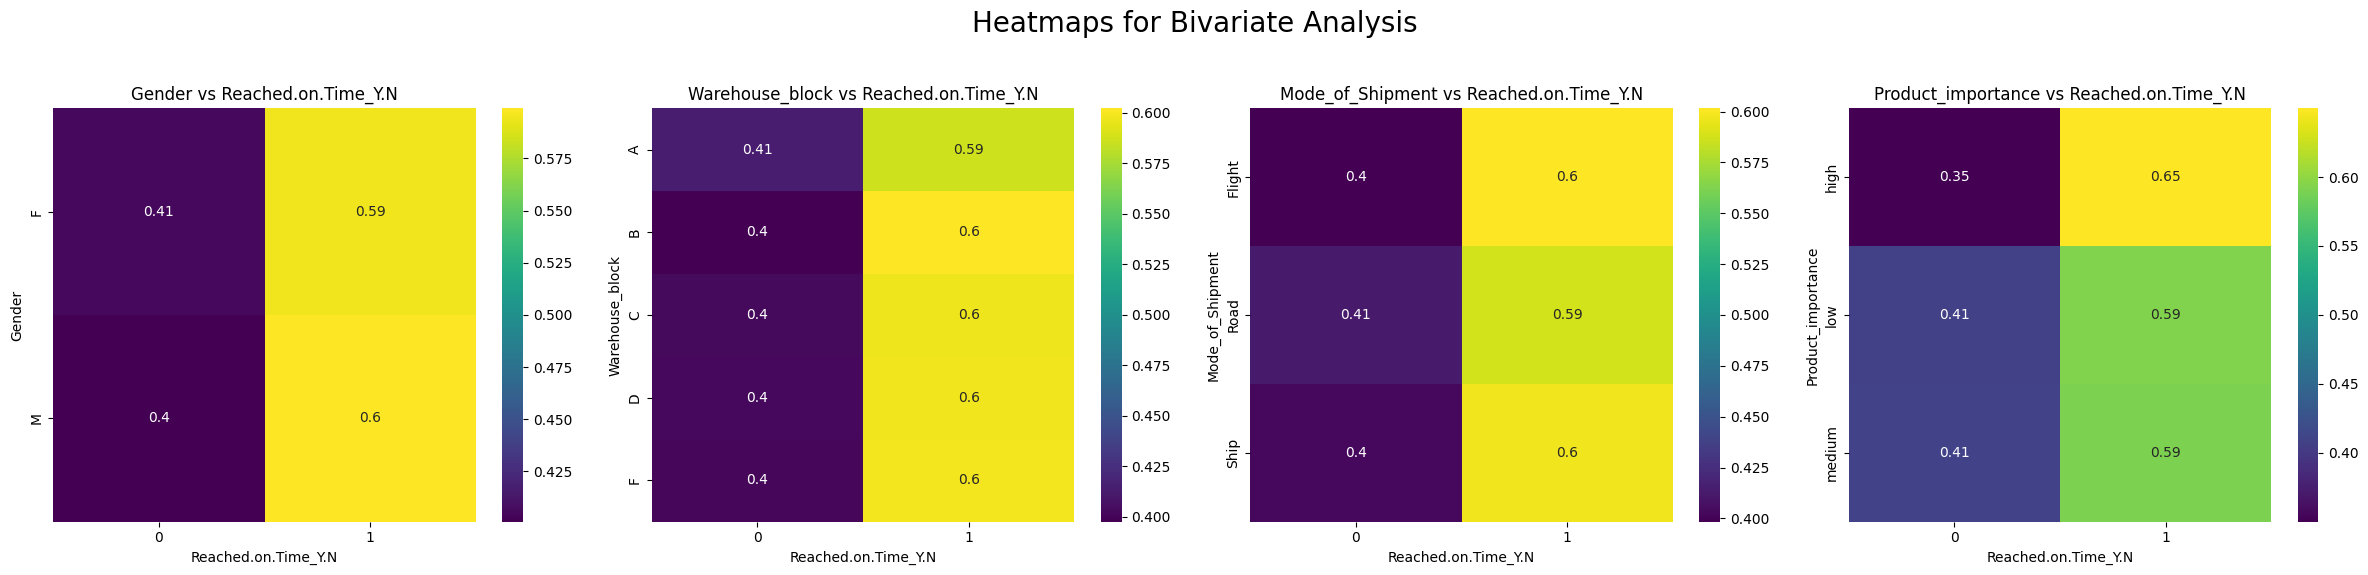

In [ ]:
categorical_features = ['Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
target_feature = 'Reached.on.Time_Y.N'
heatmaps_data = [
    pd.crosstab(df[cat_feature], df[target_feature], normalize='index')
    for cat_feature in categorical_features
]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
fig.suptitle('Heatmaps for Bivariate Analysis', fontsize=20)

for i, cat_feature in enumerate(categorical_features):
    sns.heatmap(heatmaps_data[i], annot=True, cmap='viridis', ax=axes[i])
    axes[i].set_title(f'{cat_feature} vs {target_feature}')
    axes[i].set_xlabel(target_feature)
    axes[i].set_ylabel(cat_feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Multivariate Analysis

<Figure size 1600x1200 with 0 Axes>

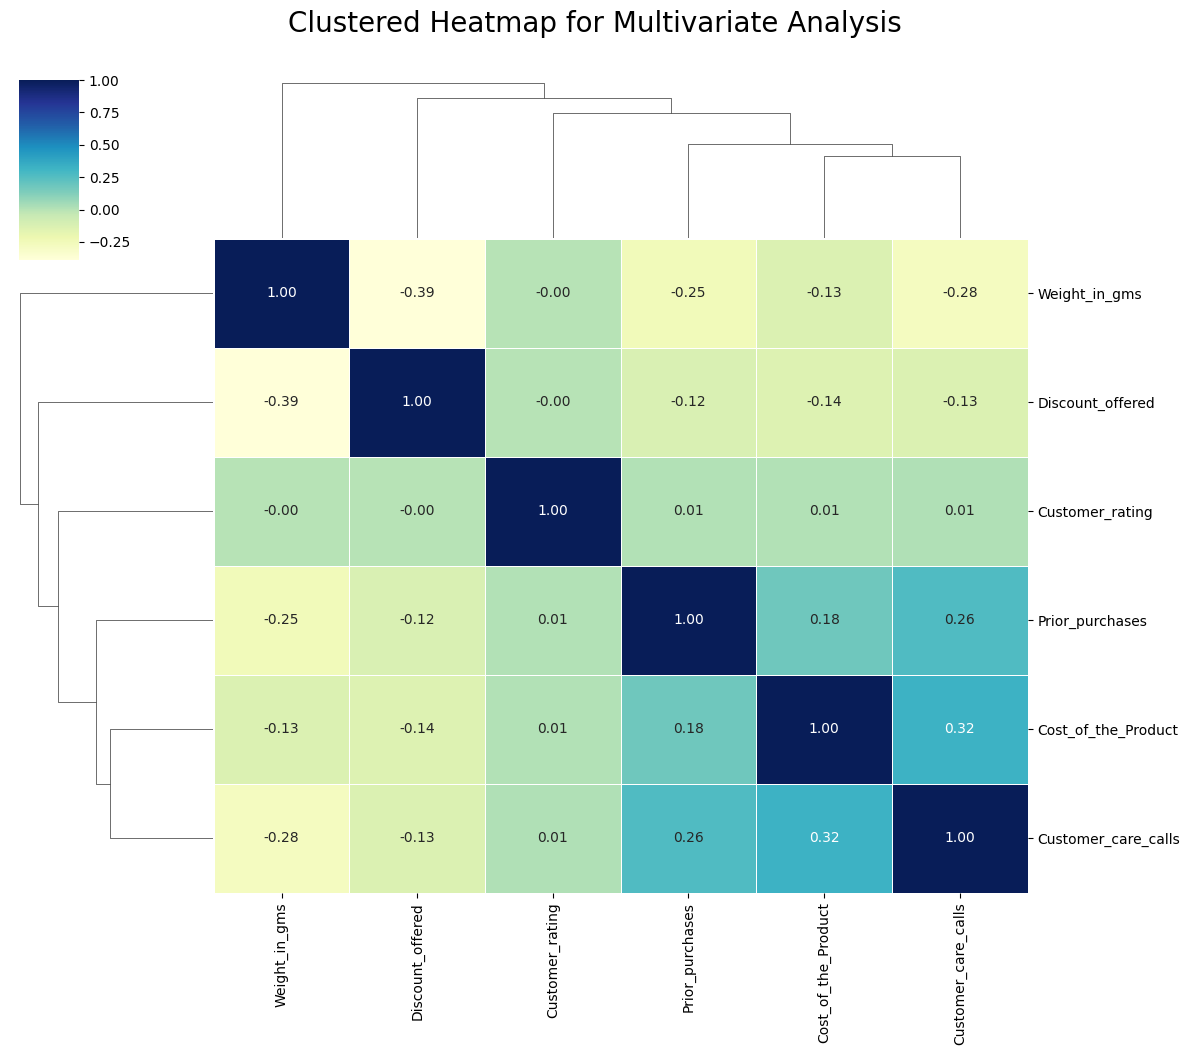

In [ ]:
numerical_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases']

plt.figure(figsize=(16, 12))
sns.clustermap(df[numerical_features].corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu", figsize=(12, 10))
plt.suptitle('Clustered Heatmap for Multivariate Analysis', fontsize=20, y=1.05)
plt.show()

### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
columns=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for column in columns:
    df[column] = le.fit_transform(df[column])
df.head()
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3.0,1,0,19.0,1233,1
1,4,0,4,5,216,2.0,1,1,19.0,3088,1
2,0,0,2,2,183,4.0,1,1,19.0,3374,1
3,1,0,3,3,176,4.0,2,1,10.0,1177,1
4,2,0,2,2,184,3.0,2,0,19.0,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,0,1.0,1538,1
10995,1,2,4,1,232,5.0,2,0,6.0,1247,0
10996,2,2,5,4,242,5.0,1,0,4.0,1155,0
10997,4,2,5,2,223,5.5,2,1,2.0,1210,0


In [ ]:
y=df['Reached.on.Time_Y.N']
x=df.drop(columns=['Reached.on.Time_Y.N'],axis=1)

In [ ]:
df.corr()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,1.000000,0.000617,0.014496,0.010169,-0.006679,-0.006632,0.004260,-0.003700,0.007794,0.004086,0.005214
Mode_of_Shipment,0.000617,1.000000,-0.020164,0.001679,0.006681,-0.006336,0.004911,-0.011288,0.001722,-0.000797,-0.000535
Customer_care_calls,0.014496,-0.020164,1.000000,0.012209,0.323182,0.264801,0.006273,0.002545,-0.133149,-0.276615,-0.067126
Customer_rating,0.010169,0.001679,0.012209,1.000000,0.009270,0.008450,0.003157,0.002775,-0.001346,-0.001897,0.013119
Cost_of_the_Product,-0.006679,0.006681,0.323182,0.009270,1.000000,0.180123,0.006366,0.019759,-0.143876,-0.132604,-0.073587
Prior_purchases,-0.006632,-0.006336,0.264801,0.008450,0.180123,1.000000,0.013841,-0.008808,-0.119570,-0.253856,-0.074934
Product_importance,0.004260,0.004911,0.006273,0.003157,0.006366,0.013841,1.000000,-0.009865,-0.007683,0.001652,-0.023483
Gender,-0.003700,-0.011288,0.002545,0.002775,0.019759,-0.008808,-0.009865,1.000000,-0.012533,0.003573,0.004689
Discount_offered,0.007794,0.001722,-0.133149,-0.001346,-0.143876,-0.119570,-0.007683,-0.012533,1.000000,-0.389933,0.410716
Weight_in_gms,0.004086,-0.000797,-0.276615,-0.001897,-0.132604,-0.253856,0.001652,0.003573,-0.389933,1.000000,-0.268793


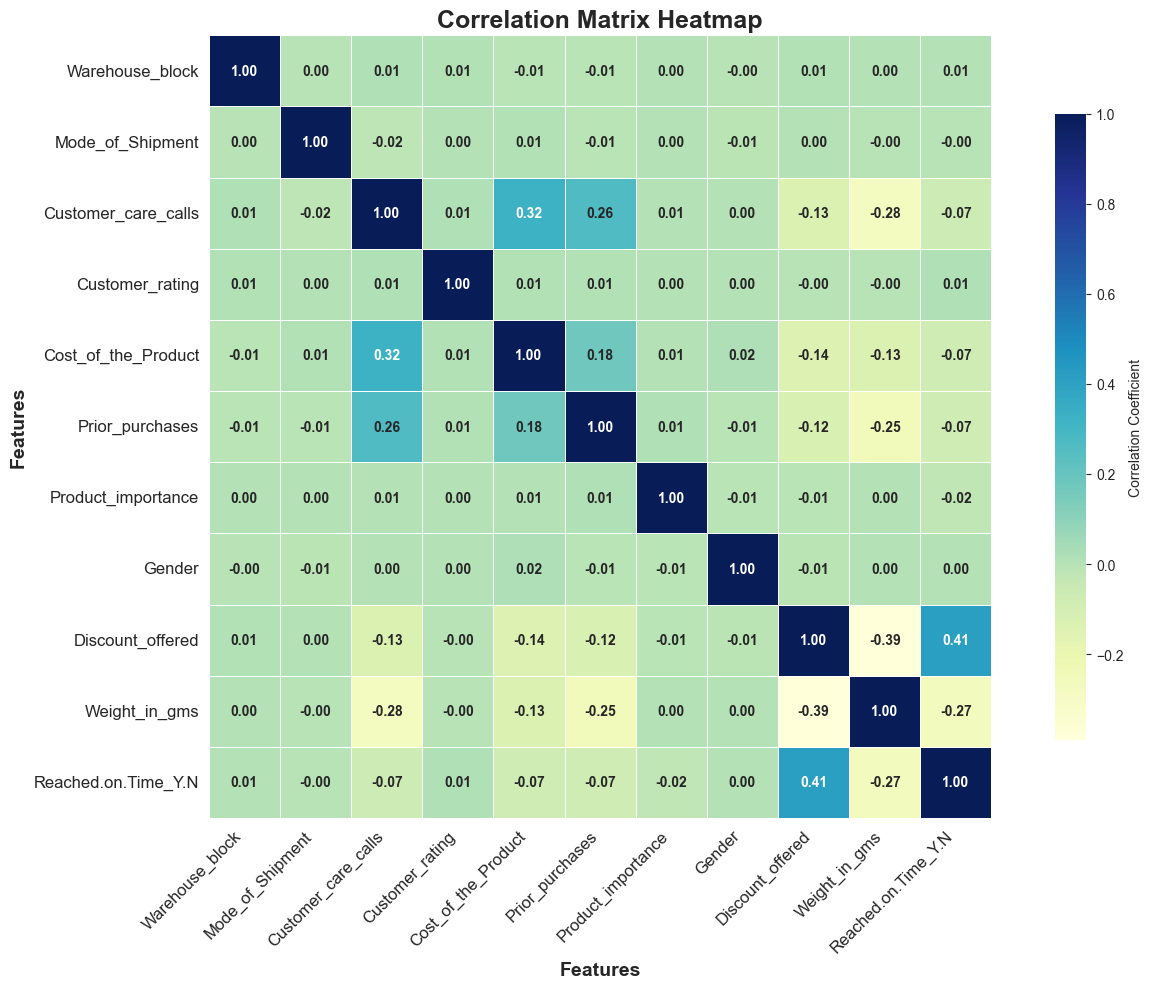

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.set_style('whitegrid')
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    square=True,
    annot_kws={'size': 10, 'weight': 'bold'}
)
plt.title('Correlation Matrix Heatmap', fontsize=18, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [ ]:
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3.0,1,0,19.0,1233
1,4,0,4,5,216,2.0,1,1,19.0,3088
2,0,0,2,2,183,4.0,1,1,19.0,3374
3,1,0,3,3,176,4.0,2,1,10.0,1177
4,2,0,2,2,184,3.0,2,0,19.0,2484
...,...,...,...,...,...,...,...,...,...,...
10994,0,2,4,1,252,5.0,2,0,1.0,1538
10995,1,2,4,1,232,5.0,2,0,6.0,1247
10996,2,2,5,4,242,5.0,1,0,4.0,1155
10997,4,2,5,2,223,5.5,2,1,2.0,1210


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [ ]:
names=x.columns
names

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.4471892 , -2.00415767, -0.04771132, ..., -0.99176046,
         1.70774793, -1.46823975],
       [ 1.11803399, -2.00415767, -0.04771132, ...,  1.00830799,
         1.70774793, -0.33389333],
       [-1.56534517, -2.00415767, -1.79988745, ...,  1.00830799,
         1.70774793, -0.15900218],
       ...,
       [-0.22365559,  0.63834175,  0.82837675, ..., -0.99176046,
        -0.75321157, -1.51593733],
       [ 1.11803399,  0.63834175,  0.82837675, ...,  1.00830799,
        -1.08133951, -1.48230442],
       [ 0.4471892 ,  0.63834175, -1.79988745, ..., -0.99176046,
        -0.42508364, -1.2199677 ]])

In [ ]:
x=pd.DataFrame(x,columns=names)
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,0.447189,-2.004158,-0.047711,-0.700755,-0.690722,-0.370875,-0.548034,-0.991760,1.707748,-1.468240
1,1.118034,-2.004158,-0.047711,1.421578,0.120746,-1.250497,-0.548034,1.008308,1.707748,-0.333893
2,-1.565345,-2.004158,-1.799887,-0.700755,-0.565881,0.508748,-0.548034,1.008308,1.707748,-0.159002
3,-0.894500,-2.004158,-0.923799,0.006689,-0.711529,0.508748,1.035735,1.008308,0.231172,-1.502484
4,-0.223656,-2.004158,-1.799887,-0.700755,-0.545074,-0.370875,1.035735,-0.991760,1.707748,-0.703244
...,...,...,...,...,...,...,...,...,...,...
10994,-1.565345,0.638342,-0.047711,-1.408199,0.869792,1.388371,1.035735,-0.991760,-1.245403,-1.281730
10995,-0.894500,0.638342,-0.047711,-1.408199,0.453655,1.388371,1.035735,-0.991760,-0.425084,-1.459679
10996,-0.223656,0.638342,0.828377,0.714133,0.661724,1.388371,-0.548034,-0.991760,-0.753212,-1.515937
10997,1.118034,0.638342,0.828377,-0.700755,0.266394,1.828182,1.035735,1.008308,-1.081340,-1.482304


## Classification Models

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=56,max_depth=5)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print(f"Accuracy without Hyperparameter Tuning and SMOTE: {accuracy:.6f}")
print("Classification Report without Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, pred))
print("Confusion Matrix without Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, pred))

Accuracy without Hyperparameter Tuning and SMOTE: 0.690000
Classification Report without Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.58      0.91      0.71      1379
           1       0.89      0.53      0.67      1921

    accuracy                           0.69      3300
   macro avg       0.74      0.72      0.69      3300
weighted avg       0.76      0.69      0.69      3300

Confusion Matrix without Hyperparameter Tuning and SMOTE:
 [[1250  129]
 [ 894 1027]]


In [ ]:
smote = SMOTE(random_state=42)
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=56,max_depth=5)

pipeline = Pipeline([
    ('smote', smote),
    ('classifier', classifier)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params,"\n")
print("Best Cross-Validation Score:", best_score)

y_pred = grid_search.predict(x_test)

print("Accuracy with Hyperparameter Tuning and SMOTE:", accuracy_score(y_test, y_pred))
print("\nClassification Report with Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, y_pred))
print("Confusion Matrix with Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200} 

Best Cross-Validation Score: 0.6839847936339164
Accuracy with Hyperparameter Tuning and SMOTE: 0.6893939393939394

Classification Report with Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.58      0.95      0.72      1379
           1       0.93      0.50      0.65      1921

    accuracy                           0.69      3300
   macro avg       0.75      0.73      0.69      3300
weighted avg       0.78      0.69      0.68      3300

Confusion Matrix with Hyperparameter Tuning and SMOTE:
 [[1306   73]
 [ 952  969]]


#### Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='sag', penalty='l2', random_state=42)
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)

print("Accuracy without Hyperparameter Tuning and SMOTE:", accuracy_score(y_test, log_reg_pred))
print("Classification Report without Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, log_reg_pred))
print("Confusion Matrix without Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, log_reg_pred))

Accuracy without Hyperparameter Tuning and SMOTE: 0.6284848484848485
Classification Report without Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54      1379
           1       0.67      0.70      0.69      1921

    accuracy                           0.63      3300
   macro avg       0.62      0.61      0.61      3300
weighted avg       0.63      0.63      0.63      3300

Confusion Matrix without Hyperparameter Tuning and SMOTE:
 [[ 725  654]
 [ 572 1349]]


In [ ]:
smote = SMOTE(random_state=42)
classifier = LogisticRegression(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('classifier', classifier)
])

param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params,"\n")
print("Best Cross-Validation Score:", best_score)

log_reg_pred_tuned = grid_search.predict(x_test)
accuracy_tuned = accuracy_score(y_test, log_reg_pred_tuned)

print(f"Accuracy with Hyperparameter Tuning and SMOTE: {accuracy_tuned:.8f}")
print("\nClassification Report with Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, log_reg_pred_tuned))
print("Confusion Matrix with Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, log_reg_pred_tuned))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters: {'classifier__C': 0.01, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'} 

Best Cross-Validation Score: 0.6511227264283181
Accuracy with Hyperparameter Tuning and SMOTE: 0.64363636

Classification Report with Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.55      0.76      0.64      1379
           1       0.77      0.56      0.65      1921

    accuracy                           0.64      3300
   macro avg       0.66      0.66      0.64      3300
weighted avg       0.68      0.64      0.64      3300

Confusion Matrix with Hyperparameter Tuning and SMOTE:
 [[1053  326]
 [ 850 1071]]


#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)

print(f"Accuracy without Hyperparameter Tuning and SMOTE: {accuracy:.6f}")
print("Classification Report without Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix without Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, dt_pred))

Accuracy without Hyperparameter Tuning and SMOTE: 0.647576
Classification Report without Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.58      0.57      0.58      1379
           1       0.70      0.70      0.70      1921

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300

Confusion Matrix without Hyperparameter Tuning and SMOTE:
 [[ 787  592]
 [ 571 1350]]


In [ ]:
smote = SMOTE(random_state=42)
classifier = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline([
    ('smote', smote),
    ('classifier', classifier)
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params,"\n")
print("Best Cross-Validation Score:", best_score)

dt_pred_tuned = grid_search.predict(x_test)
accuracy_tuned = accuracy_score(y_test, dt_pred_tuned)

print(f"Accuracy with Hyperparameter Tuning and SMOTE: {accuracy_tuned:.6f}")
print("\nClassification Report with Hyperparameter Tuning and SMOTE:\n", classification_report(y_test, dt_pred_tuned))
print("Confusion Matrix with Hyperparameter Tuning and SMOTE:\n", confusion_matrix(y_test, dt_pred_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2} 

Best Cross-Validation Score: 0.6646317814738868
Accuracy with Hyperparameter Tuning and SMOTE: 0.677576

Classification Report with Hyperparameter Tuning and SMOTE:
               precision    recall  f1-score   support

           0       0.57      0.89      0.70      1379
           1       0.87      0.53      0.66      1921

    accuracy                           0.68      3300
   macro avg       0.72      0.71      0.68      3300
weighted avg       0.74      0.68      0.67      3300

Confusion Matrix with Hyperparameter Tuning and SMOTE:
 [[1224  155]
 [ 909 1012]]


In [ ]:
import pickle
with open('gbhfinal.pkl', 'wb') as f:
    pickle.dump(grid_search, f)
scaler_file = 'scalerfinal.pkl'
with open(scaler_file, 'wb') as file:
    pickle.dump(sc, file)